In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
df = pd.read_csv("gurgaon_properties_missing_value_imputation.csv")

In [30]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2,2,2.0,New Property,850.0,0,0,0,0,0,2,8
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2,2,4.0,New Property,1226.0,1,1,0,0,0,2,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2,1,17.0,New Property,1000.0,0,0,0,0,0,2,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,0,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2,1,5.0,Relatively New,582.0,0,0,1,0,0,2,159


##### GOAL : 
To predict the price based on given user input (#bedrooms, bathrooms, location, etc)

- Since we are predicting the price, the columns 'society' and 'price_per_sqft' are not relevant and would be removed.
- 'price_per_sqft' would directly give the price, given the area(sqft).
- 'society' can be used to directly look up the prices elsewhere. Also, would create too many categories to be useful.

In [31]:
train_df = df.drop(columns = ['society', 'price_per_sqft'])

In [32]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
161,flat,sector 108,0.93,2.0,3,3,10.0,Relatively New,1161.0,0,0,0,0,0,2,81
40,flat,sector 67,2.80,3.0,3,3,5.0,Moderately Old,2047.0,0,1,0,0,0,1,26
1484,flat,sector 89,0.88,2.0,2,3,2.0,New Property,1228.0,1,0,0,0,0,2,44
1372,flat,sector 56,1.65,3.0,3,3+,5.0,Moderately Old,2131.0,1,0,0,0,0,0,134
3306,flat,sector 109,1.60,4.0,1,0,0.0,New Property,3008.0,0,0,0,0,0,2,0


- Now, the 'luxury_score' column would be converted to a categorical column, since it wouldnt make sense to ask the user to provice the model with a 'luxury_score'.
- The 'luxury_score' would be categorized as: Low (score < 50), Medium(score 50-149), High(score >= 150)

In [33]:
def convert_luxury_score(score):
    try:
        if score<50:
            return "Low"
        if score<150:
            return "Medium"
        return "High"
    except:
        return None

In [34]:
train_df['luxury_category'] = train_df['luxury_score'].apply(convert_luxury_score)

In [35]:
train_df.head(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2,2,2.0,New Property,850.0,0,0,0,0,0,2,8,Low
1,flat,sector 89,0.95,2.0,2,2,4.0,New Property,1226.0,1,1,0,0,0,2,38,Low
2,flat,sohna road,0.32,2.0,2,1,17.0,New Property,1000.0,0,0,0,0,0,2,49,Low
3,flat,sector 92,1.60,3.0,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,0,174,High
4,flat,sector 102,0.48,2.0,2,1,5.0,Relatively New,582.0,0,0,1,0,0,2,159,High


Similar to above, we can also categorize Floor numbers based on "Low", "Mid" or "High" floors, as it is not practical to ask for exact floor numbers.

In [36]:
def categorize_floors(floorNum):
    try:
        if floorNum <= 2:
            return "Low Floor" 
        if floorNum <= 10:
            return "Mid Floor" 
        return "High Floor"
    except:
        return None

In [37]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floors)

In [38]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
3278,flat,sector 103,2.00,4.0,5,3+,14.0,New Property,2416.0,0,1,0,0,0,2,45,Low,High Floor
3432,flat,sector 84,0.89,3.0,3,3,8.0,Relatively New,1833.0,0,0,0,1,0,2,67,Medium,Mid Floor
201,flat,sector 56,2.05,4.0,4,3,7.0,Relatively New,2000.0,0,1,0,0,1,0,49,Low,Mid Floor
689,flat,sector 65,5.40,3.0,4,3,19.0,Moderately Old,2696.0,1,1,0,0,0,0,174,High,High Floor
960,house,sector 12,3.71,3.0,3,1,4.0,Moderately Old,1872.0,0,0,0,1,0,2,0,Low,Mid Floor


In [39]:
train_df.drop(columns= ['floorNum', 'luxury_score'], inplace=True)

In [40]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2,2,New Property,850.0,0,0,0,0,0,2,Low,Low Floor
1,flat,sector 89,0.95,2.0,2,2,New Property,1226.0,1,1,0,0,0,2,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2,1,New Property,1000.0,0,0,0,0,0,2,Low,High Floor
3,flat,sector 92,1.60,3.0,4,3+,Relatively New,1615.0,0,1,0,0,1,0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2,1,Relatively New,582.0,0,0,1,0,0,2,High,Mid Floor


## Feature Selection 

- Now, the feature selection algorithms would be used to identify the most useful features from the ones remaining, wrt the output column ie. price.
- The categorical columns would be converted to ordinal using the Ordinal Encoder from sklearn for above process

#### NOTE: 

- Although ordinal encoding will create issues with linear classifiers (due to higher values being ranked higher), since our goal is to get feature importances here, it wont impact as much.

In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [42]:
train_df.dtypes

property_type       object
sector              object
price              float64
bedRoom            float64
bathroom             int64
balcony             object
agePossession       object
built_up_area      float64
study room           int64
servant room         int64
store room           int64
pooja room           int64
others               int64
furnishing_type      int64
luxury_category     object
floor_category      object
dtype: object

In [43]:

data_label_encoded = train_df.copy()

feats = ['property_type', 'sector', 'balcony', 'agePossession', 'luxury_category', 'floor_category']

for feature in feats:
    enc = OrdinalEncoder()
    data_label_encoded[feature] = enc.fit_transform(data_label_encoded[feature].to_numpy().reshape(-1, 1))
    print(enc.categories_)

X_label = data_label_encoded.drop(columns=['price'])
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [44]:
X_label.sample(5)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
1138,0.0,33.0,4.0,5,4.0,0.0,3406.0,0,1,0,0,1,0,1.0,2.0
1543,0.0,68.0,4.0,5,3.0,3.0,2604.0,0,1,0,0,0,0,1.0,0.0
145,1.0,39.0,5.0,6,3.0,1.0,4125.0,1,1,0,0,0,2,2.0,2.0
2726,0.0,25.0,1.0,1,1.0,0.0,450.0,0,0,0,0,0,0,1.0,2.0
1454,0.0,62.0,4.0,3,4.0,0.0,2000.0,0,0,0,1,0,1,1.0,2.0


### Feature selection 1 - Correlation with price

<Axes: >

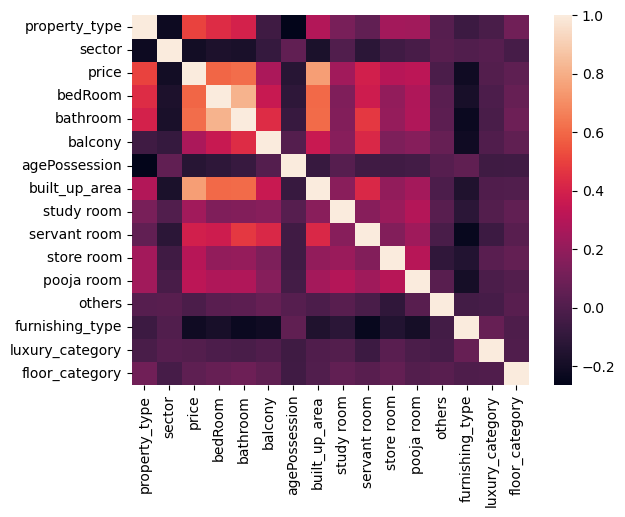

In [45]:
sns.heatmap(data_label_encoded.corr())

In [75]:
fi_1 = data_label_encoded.corr()
fi_1_df = pd.DataFrame(data={'features':fi_1.index.values,"correlation":fi_1['price'].iloc[:].values})

In [86]:
fi_1_df = fi_1_df[fi_1_df['features'] != 'price']

In [87]:
fi_1_df

,features,correlation
0,property_type,0.503728
1,sector,-0.201678
3,bedRoom,0.591380
4,bathroom,0.609777
5,balcony,0.269637
6,agePossession,-0.132989
7,built_up_area,0.748574
8,study room,0.242955
9,servant room,0.391930
10,store room,0.305677


**Observation** : Price has decent correlation with builtup area, bedroom, bathroom. Hence they might be useful features in prediction.

### Feature selection 2 - Features from Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor(n_estimators=150, random_state = 42)
rf_clf.fit(X_label, y_label)

RandomForestRegressor(n_estimators=150, random_state=42)

In [97]:
#rf_clf.feature_importances_
fi_2_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_rf':rf_clf.feature_importances_})

In [98]:
fi_2_df.sort_values('importances_rf')

,features,importances_rf
11,others,0.003270
10,pooja room,0.006097
14,floor_category,0.006292
12,furnishing_type,0.007398
13,luxury_category,0.007843
9,store room,0.008280
7,study room,0.008700
4,balcony,0.012644
5,agePossession,0.014529
8,servant room,0.019563


**Observation** : Again, built_up_area seems to be the most important feature wrt price. Some others like sector and property_type may also influence prices as per random forest model.

### Feature selection 3 - Gradient boosting model based feature importances

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

gb_clf = GradientBoostingRegressor()
gb_clf.fit(X_label, y_label)

GradientBoostingRegressor()

In [100]:
fi_3_df = pd.DataFrame(data={'features':X_label.columns.values,'importances_gb':gb_clf.feature_importances_})
fi_3_df.sort_values('importances_gb')

,features,importances_gb
10,pooja room,0.000450
13,luxury_category,0.000458
14,floor_category,0.000564
11,others,0.000631
12,furnishing_type,0.000922
4,balcony,0.001837
5,agePossession,0.003799
7,study room,0.004377
9,store room,0.009544
8,servant room,0.021556


### Feature selection 4 - Permutation Importance ie. Permute feature values and test fitted classifier to understand feature significance in classification/regression

In [101]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, train_size=0.8, random_state=42)

rf_clf = RandomForestRegressor(n_estimators=150, random_state=42)
rf_clf.fit(X_train, y_train)

perm_imp = permutation_importance(rf_clf, X_test, y_test, n_repeats=30, random_state = 42)

In [103]:
fi_4_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_pi':perm_imp['importances_mean']})
fi_4_df.sort_values('importances_pi')

,features,importances_pi
7,study room,-0.013841
12,furnishing_type,-0.001506
14,floor_category,0.000431
11,others,0.000550
9,store room,0.001371
10,pooja room,0.001591
4,balcony,0.001885
13,luxury_category,0.003902
5,agePossession,0.006813
2,bedRoom,0.016871


### Feature selection 5 - Lasso based feature importances

**Note** : Since the encoding used are Ordinal, hence the linear models might not perform the best. 

In [104]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled  = sc.fit_transform(X_label)

lasso_clf = Lasso(alpha = 0.01, random_state = 42)
lasso_clf.fit(X_scaled, y_label)


Lasso(alpha=0.01, random_state=42)

In [105]:
lasso_clf.coef_

array([ 0.71357999, -0.0527244 ,  0.01734464,  0.2795424 , -0.0447957 ,
       -0.        ,  1.51162557,  0.17529304,  0.1666231 ,  0.19876313,
        0.07491596, -0.01445026, -0.13863134,  0.05095458, -0.00172679])

In [109]:
fi_5_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_lasso':np.abs(lasso_clf.coef_)})
fi_5_df.sort_values('importances_lasso')

,features,importances_lasso
5,agePossession,0.000000
14,floor_category,0.001727
11,others,0.014450
2,bedRoom,0.017345
4,balcony,0.044796
13,luxury_category,0.050955
1,sector,0.052724
10,pooja room,0.074916
12,furnishing_type,0.138631
8,servant room,0.166623


### Feature selection 6 - Recursive feature elimination (RFE)

In [111]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

feature_selector = RFE(estimator=estimator, n_features_to_select=X_label.shape[1], step=1)
feature_selector.fit(X_label, y_label)

RFE(estimator=RandomForestRegressor(), n_features_to_select=15)

In [115]:
#feature_selector.estimator_.feature_importances_
fi_6_df = pd.DataFrame(data={'features':X_label.columns.values, 'importances_rfe':feature_selector.estimator_.feature_importances_})
fi_6_df.sort_values('importances_rfe')

,features,importances_rfe
11,others,0.003443
14,floor_category,0.006157
10,pooja room,0.006228
13,luxury_category,0.007471
9,store room,0.007547
12,furnishing_type,0.007659
7,study room,0.008840
4,balcony,0.012448
5,agePossession,0.013610
8,servant room,0.021080


### Feature selection 7 - Linear Regression coefficients

In [116]:
from sklearn.linear_model import LinearRegression

lin_reg_clf = LinearRegression()
lin_reg_clf.fit(X_scaled, y_label)

LinearRegression()

In [118]:
fi_7_df = pd.DataFrame(data = {'features':X_label.columns.values, 'importances_lr':np.abs(lin_reg_clf.coef_)})
fi_7_df.sort_values('importances_lr')

,features,importances_lr
5,agePossession,0.001376
14,floor_category,0.012409
2,bedRoom,0.020326
11,others,0.022372
1,sector,0.061598
13,luxury_category,0.062250
4,balcony,0.067800
10,pooja room,0.077877
12,furnishing_type,0.147879
8,servant room,0.175967


Merge the results from the 7 feature selection methods.

In [120]:
fi_merged_df = fi_1_df.merge(fi_2_df, on='features').merge(fi_3_df, on='features').merge(fi_4_df, on='features').merge(fi_5_df, on='features').merge(fi_6_df, on='features').merge(fi_7_df, on='features')

In [121]:
fi_merged_df

,features,correlation,importances_rf,importances_gb,importances_pi,importances_lasso,importances_rfe,importances_lr
0,property_type,0.503728,0.101263,0.096832,0.212122,0.713580,0.100065,0.713500
1,sector,-0.201678,0.104140,0.101251,0.185278,0.052724,0.103592,0.061598
2,bedRoom,0.591380,0.024572,0.038028,0.016871,0.017345,0.025921,0.020326
3,bathroom,0.609777,0.026460,0.035895,0.018150,0.279542,0.023579,0.286175
4,balcony,0.269637,0.012644,0.001837,0.001885,0.044796,0.012448,0.067800
5,agePossession,-0.132989,0.014529,0.003799,0.006813,0.000000,0.013610,0.001376
6,built_up_area,0.748574,0.648949,0.683856,0.740973,1.511626,0.652360,1.514198
7,study room,0.242955,0.008700,0.004377,-0.013841,0.175293,0.008840,0.183480
8,servant room,0.391930,0.019563,0.021556,0.021422,0.166623,0.021080,0.175967
9,store room,0.305677,0.008280,0.009544,0.001371,0.198763,0.007547,0.203064


In [123]:
#Since absolute values of correlation matter (not the sign)
fi_merged_df['correlation']=fi_merged_df['correlation'].apply(np.abs)
fi_merged_df

,features,correlation,importances_rf,importances_gb,importances_pi,importances_lasso,importances_rfe,importances_lr
0,property_type,0.503728,0.101263,0.096832,0.212122,0.713580,0.100065,0.713500
1,sector,0.201678,0.104140,0.101251,0.185278,0.052724,0.103592,0.061598
2,bedRoom,0.591380,0.024572,0.038028,0.016871,0.017345,0.025921,0.020326
3,bathroom,0.609777,0.026460,0.035895,0.018150,0.279542,0.023579,0.286175
4,balcony,0.269637,0.012644,0.001837,0.001885,0.044796,0.012448,0.067800
5,agePossession,0.132989,0.014529,0.003799,0.006813,0.000000,0.013610,0.001376
6,built_up_area,0.748574,0.648949,0.683856,0.740973,1.511626,0.652360,1.514198
7,study room,0.242955,0.008700,0.004377,-0.013841,0.175293,0.008840,0.183480
8,servant room,0.391930,0.019563,0.021556,0.021422,0.166623,0.021080,0.175967
9,store room,0.305677,0.008280,0.009544,0.001371,0.198763,0.007547,0.203064


In [129]:
fi_merged_df.index=fi_merged_df['features']
fi_merged_df = fi_merged_df.drop(columns=['features'])

In [130]:
fi_merged_df

,correlation,importances_rf,importances_gb,importances_pi,importances_lasso,importances_rfe,importances_lr
features,,,,,,,
property_type,0.503728,0.101263,0.096832,0.212122,0.713580,0.100065,0.713500
sector,0.201678,0.104140,0.101251,0.185278,0.052724,0.103592,0.061598
bedRoom,0.591380,0.024572,0.038028,0.016871,0.017345,0.025921,0.020326
bathroom,0.609777,0.026460,0.035895,0.018150,0.279542,0.023579,0.286175
balcony,0.269637,0.012644,0.001837,0.001885,0.044796,0.012448,0.067800
agePossession,0.132989,0.014529,0.003799,0.006813,0.000000,0.013610,0.001376
built_up_area,0.748574,0.648949,0.683856,0.740973,1.511626,0.652360,1.514198
study room,0.242955,0.008700,0.004377,-0.013841,0.175293,0.008840,0.183480
servant room,0.391930,0.019563,0.021556,0.021422,0.166623,0.021080,0.175967


Normalize the values of each row based on the sum of the column values

In [134]:
sum_column_values = fi_merged_df.sum(axis=0) #Sum of values in each column (new row with sum of all rows above)
fi_merged_norm = fi_merged_df.divide(sum_column_values, axis=1) #Normalize by the sum computed by adding all rows with the row values

In [135]:
fi_merged_norm 

,correlation,importances_rf,importances_gb,importances_pi,importances_lasso,importances_rfe,importances_lr
features,,,,,,,
property_type,0.109559,0.101263,0.096832,0.177358,0.207378,0.100065,0.200971
sector,0.043864,0.104140,0.101251,0.154913,0.015323,0.103592,0.017350
bedRoom,0.128623,0.024572,0.038028,0.014106,0.005041,0.025921,0.005725
bathroom,0.132624,0.026460,0.035895,0.015175,0.081239,0.023579,0.080606
balcony,0.058645,0.012644,0.001837,0.001576,0.013018,0.012448,0.019097
agePossession,0.028925,0.014529,0.003799,0.005696,0.000000,0.013610,0.000388
built_up_area,0.162812,0.648949,0.683856,0.619536,0.439302,0.652360,0.426502
study room,0.052842,0.008700,0.004377,-0.011573,0.050943,0.008840,0.051680
servant room,0.085243,0.019563,0.021556,0.017911,0.048423,0.021080,0.049564


In [141]:
fi_merged_norm.mean(axis=1).sort_values(ascending=True)

features
others             0.003021
floor_category     0.003809
luxury_category    0.007643
agePossession      0.009564
balcony            0.017038
pooja room         0.018197
furnishing_type    0.020458
study room         0.023687
store room         0.029709
bedRoom            0.034574
servant room       0.037620
bathroom           0.056511
sector             0.077205
property_type      0.141918
built_up_area      0.519045
dtype: float64

**Observation**: 

- We can observe the feature importances as the mean of the 7 methods tried above
- Build_up_area, 'property_type' and 'sector' have consistently been observed to be important by all the methods above
- 'others' is a category which has been seen to be the least relevant
- The features with average score less than 0.03 would be tested using Random Forest Regressor to see if they affect the model performance (would be kept or removed accordingly)

In [143]:
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestRegressor(n_estimators=150, random_state = 42)
scores = cross_val_score(rf_clf, X_label, y_label, cv=5 ,scoring='r2')


In [145]:
scores.mean()

0.8212331850010429

In [152]:
scores_2 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room', 'furnishing_type', 'study room', 'store room']), y_label, cv=5 ,scoring='r2')
scores_2.mean()

0.8213811759475986

In [153]:
scores_3 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room', 'furnishing_type', 'study room']), y_label, cv=5 ,scoring='r2')
scores_3.mean()

0.8218427082317324

In [154]:
scores_4 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room', 'furnishing_type']), y_label, cv=5 ,scoring='r2')
scores_4.mean()

0.8257102302084107

In [155]:
scores_5 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room']), y_label, cv=5 ,scoring='r2')
scores_5.mean()

0.8207822975111456

In [156]:
scores_6 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony']), y_label, cv=5 ,scoring='r2')
scores_6.mean()

0.8182609324083294

In [158]:
scores_7 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category', 'agePossession']), y_label, cv=5 ,scoring='r2')
scores_7.mean()

0.82058038607203

In [159]:
scores_8 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category', 'luxury_category']), y_label, cv=5 ,scoring='r2')
scores_8.mean()

0.8224690658696737

In [160]:
scores_9 = cross_val_score(rf_clf, X_label.drop(columns=['others', 'floor_category']), y_label, cv=5 ,scoring='r2')
scores_9.mean()

0.8217907750399043

In [161]:
scores_9 = cross_val_score(rf_clf, X_label.drop(columns=['others']), y_label, cv=5 ,scoring='r2')
scores_9.mean()

0.8191566450388471

**Observation** : 

- Removal of 'others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room', 'furnishing_type' improved the cross validation accuracy significantly over the original cv score.
- Thus these features would be removed from the lower ranked features

In [164]:
X_label_final = X_label.drop(columns = ['others', 'floor_category', 'luxury_category', 'agePossession', 'balcony', 'pooja room', 'furnishing_type'])

In [166]:
X_label_final 

,property_type,sector,bedRoom,bathroom,built_up_area,study room,servant room,store room
0,0.0,40.0,3.0,2,850.0,0,0,0
1,0.0,101.0,2.0,2,1226.0,1,1,0
2,0.0,111.0,2.0,2,1000.0,0,0,0
3,0.0,105.0,3.0,4,1615.0,0,1,0
4,0.0,4.0,2.0,2,582.0,0,0,1
...,...,...,...,...,...,...,...,...
3549,0.0,96.0,2.0,2,532.0,0,0,0
3550,1.0,11.0,5.0,5,6228.0,1,1,1
3551,0.0,25.0,1.0,1,665.0,0,0,0
3552,1.0,50.0,5.0,6,5490.0,1,1,1


In [165]:
X_label_final.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)